1. CRIM  =per capita crime rate by town
2. ZN = proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS = proportion of non-retail business acres per town
4. CHAS = Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX = nitric oxides concentration (parts per 10 million)
6. RM = average number of rooms per dwelling
7. AGE =  proportion of owner-occupied units built prior to 1940
8. DIS = weighted distances to five Boston employment centres
9. RAD = index of accessibility to radial highways
10. TAX  = full-value property-tax rate per $10,000
11. PTRATIO = pupil-teacher ratio by town
12. B = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT =  % lower status of the population
14. MEDV = Median value of owner-occupied homes in $1000's


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
from sklearn.model_selection import cross_validate


In [119]:
df = pd.read_csv("train (2).csv")
df

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,400.0,199.500000,115.614301,0.00000,99.75000,199.50000,299.250000,399.0000
CRIM,400.0,3.757191,9.155496,0.00906,0.07782,0.24217,3.543428,88.9762
ZN,400.0,10.970000,22.796261,0.00000,0.00000,0.00000,12.500000,95.0000
INDUS,400.0,10.936425,6.848042,0.46000,5.13000,8.56000,18.100000,27.7400
CHAS,400.0,0.072500,0.259639,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,400.0,0.552817,0.115488,0.38500,0.44900,0.53200,0.624000,0.8710
RM,400.0,6.292165,0.709923,4.13800,5.87750,6.20850,6.620500,8.7800
AGE,400.0,68.086000,28.386888,2.90000,42.37500,76.95000,93.825000,100.0000
DIS,400.0,3.819462,2.132445,1.12960,2.10915,3.27210,5.214600,12.1265
RAD,400.0,9.462500,8.687478,1.00000,4.00000,5.00000,24.000000,24.0000


In [123]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

ID         199.500000
CRIM         3.465608
ZN          12.500000
INDUS       12.970000
CHAS         0.000000
NOX          0.175000
RM           0.743000
AGE         51.450000
DIS          3.105450
RAD         20.000000
TAX        389.000000
PTRATIO      2.800000
B           20.170000
LSTAT        9.920000
MEDV         7.900000
dtype: float64


In [124]:
df_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df_iqr

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**OUTLIERS**

**CRIM**

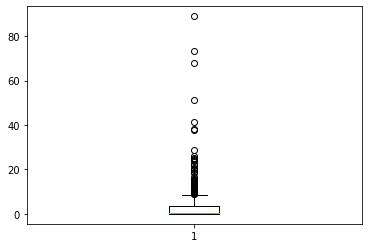

In [125]:
plt.boxplot(df["CRIM"]);

In [126]:
print(df['CRIM'].quantile(0.10))
print(df['CRIM'].quantile(0.75))
df['CRIM'] = np.where(df['CRIM'] > 10.859, 3.75, df['CRIM'])

0.037347
3.5434275000000004


**ZN**

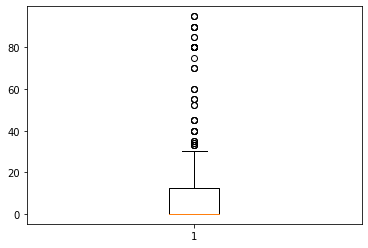

In [127]:
plt.boxplot(df["ZN"]);

In [128]:
print(df['ZN'].quantile(0.10))
print(df['ZN'].quantile(0.75))
df['ZN'] = np.where(df['ZN'] > 10.859, 12.5, df['ZN'])

0.0
12.5


**RM**

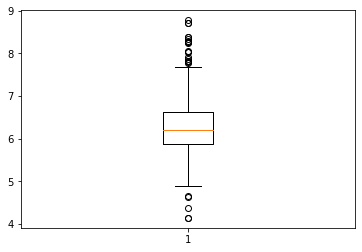

In [129]:
plt.boxplot(df["RM"]);

In [130]:
print(df['RM'].quantile(0.10))
print(df['RM'].quantile(0.95))
df['RM'] = np.where(df['RM'] < 5.57, 6.3, df['RM'])
df['RM'] = np.where(df['RM'] >7.69, 6.3, df['RM'])



5.5718000000000005
7.6946999999999965


**MEDV**

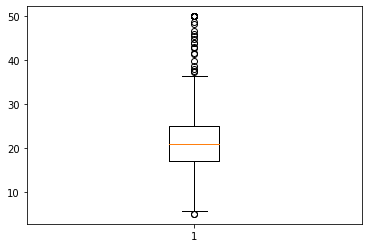

In [131]:
plt.boxplot(df["MEDV"]);

In [132]:
print(df['MEDV'].quantile(0.10))
print(df['MEDV'].quantile(0.95))
df['MEDV'] = np.where(df['MEDV'] > 43.8, 22.47, df['MEDV'])

12.98
43.80999999999999


**B**

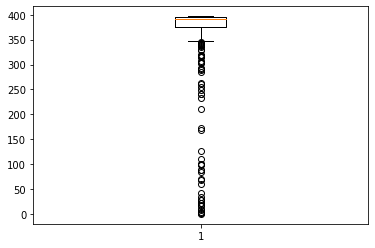

In [133]:
plt.boxplot(df["B"]);

In [134]:
print(df['B'].quantile(0.10))
print(df['B'].quantile(0.75))
df['B'] = np.where(df['B'] > 303, 360, df['B'])

303.35400000000004
396.28499999999997


**DIS**

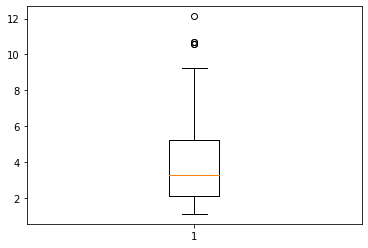

In [135]:
plt.boxplot(df["DIS"]);

In [136]:
print(df['DIS'].quantile(0.10))
print(df['DIS'].quantile(0.75))
df['DIS'] = np.where(df['DIS'] > 5.12, 3.18, df['DIS'])

1.60992
5.2146


**LSTAT**

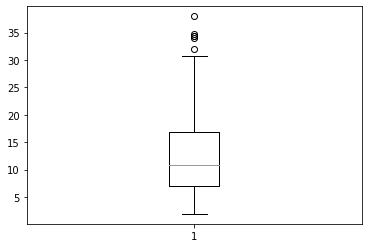

In [137]:
plt.boxplot(df["LSTAT"]);

In [138]:
print(df['LSTAT'].quantile(0.25))
print(df['LSTAT'].quantile(0.75))
df['LSTAT'] = np.where(df['LSTAT'] > 17, 12.66, df['LSTAT'])

6.99
16.91


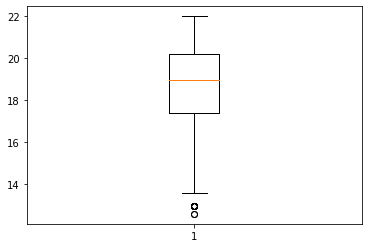

In [139]:
plt.boxplot(df["PTRATIO"]);

In [140]:
print(df['PTRATIO'].quantile(0.25))
print(df['PTRATIO'].quantile(0.75))
df['PTRATIO'] = np.where(df['PTRATIO'] < 17.4,18.45 , df['PTRATIO'])

17.4
20.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


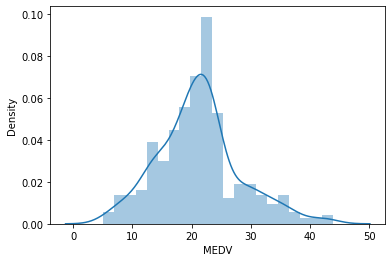

In [141]:
sns.distplot(df['MEDV'],kde=True);


**Correlation** **matrix**

           ID  CRIM    ZN  INDUS  CHAS  ...   TAX  PTRATIO     B  LSTAT  MEDV
ID       1.00  0.00 -0.05   0.01 -0.03  ... -0.01     0.05 -0.02  -0.04 -0.02
CRIM     0.00  1.00 -0.36   0.62  0.01  ...  0.82     0.47 -0.36   0.40 -0.50
ZN      -0.05 -0.36  1.00  -0.57 -0.03  ... -0.39    -0.33  0.18  -0.45  0.41
INDUS    0.01  0.62 -0.57   1.00  0.08  ...  0.73     0.51 -0.30   0.58 -0.60
CHAS    -0.03  0.01 -0.03   0.08  1.00  ... -0.05    -0.14  0.05  -0.05  0.07
NOX     -0.03  0.66 -0.50   0.76  0.08  ...  0.66     0.41 -0.34   0.55 -0.55
RM       0.01 -0.05  0.30  -0.27  0.03  ... -0.10    -0.24  0.06  -0.49  0.50
AGE     -0.03  0.50 -0.52   0.63  0.08  ...  0.50     0.39 -0.25   0.55 -0.47
DIS      0.03 -0.53  0.25  -0.62  0.00  ... -0.60    -0.29  0.27  -0.34  0.43
RAD     -0.03  0.86 -0.34   0.61 -0.02  ...  0.91     0.50 -0.37   0.40 -0.50
TAX     -0.01  0.82 -0.39   0.73 -0.05  ...  1.00     0.56 -0.37   0.47 -0.58
PTRATIO  0.05  0.47 -0.33   0.51 -0.14  ...  0.56     1.00 -0.22

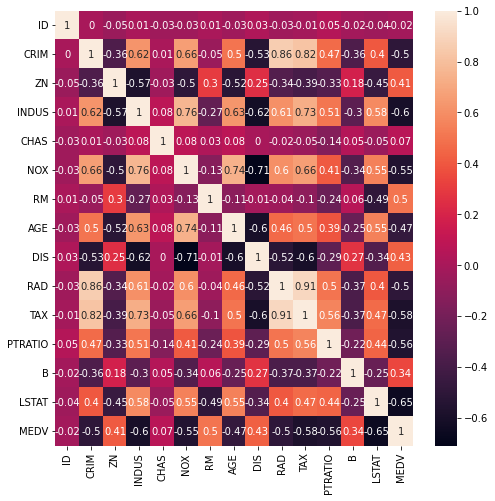

In [149]:
correlation = df.corr().round(2)
print(correlation)
x,y = plt.subplots(figsize = (8,8))
sns.heatmap(correlation,annot =True);

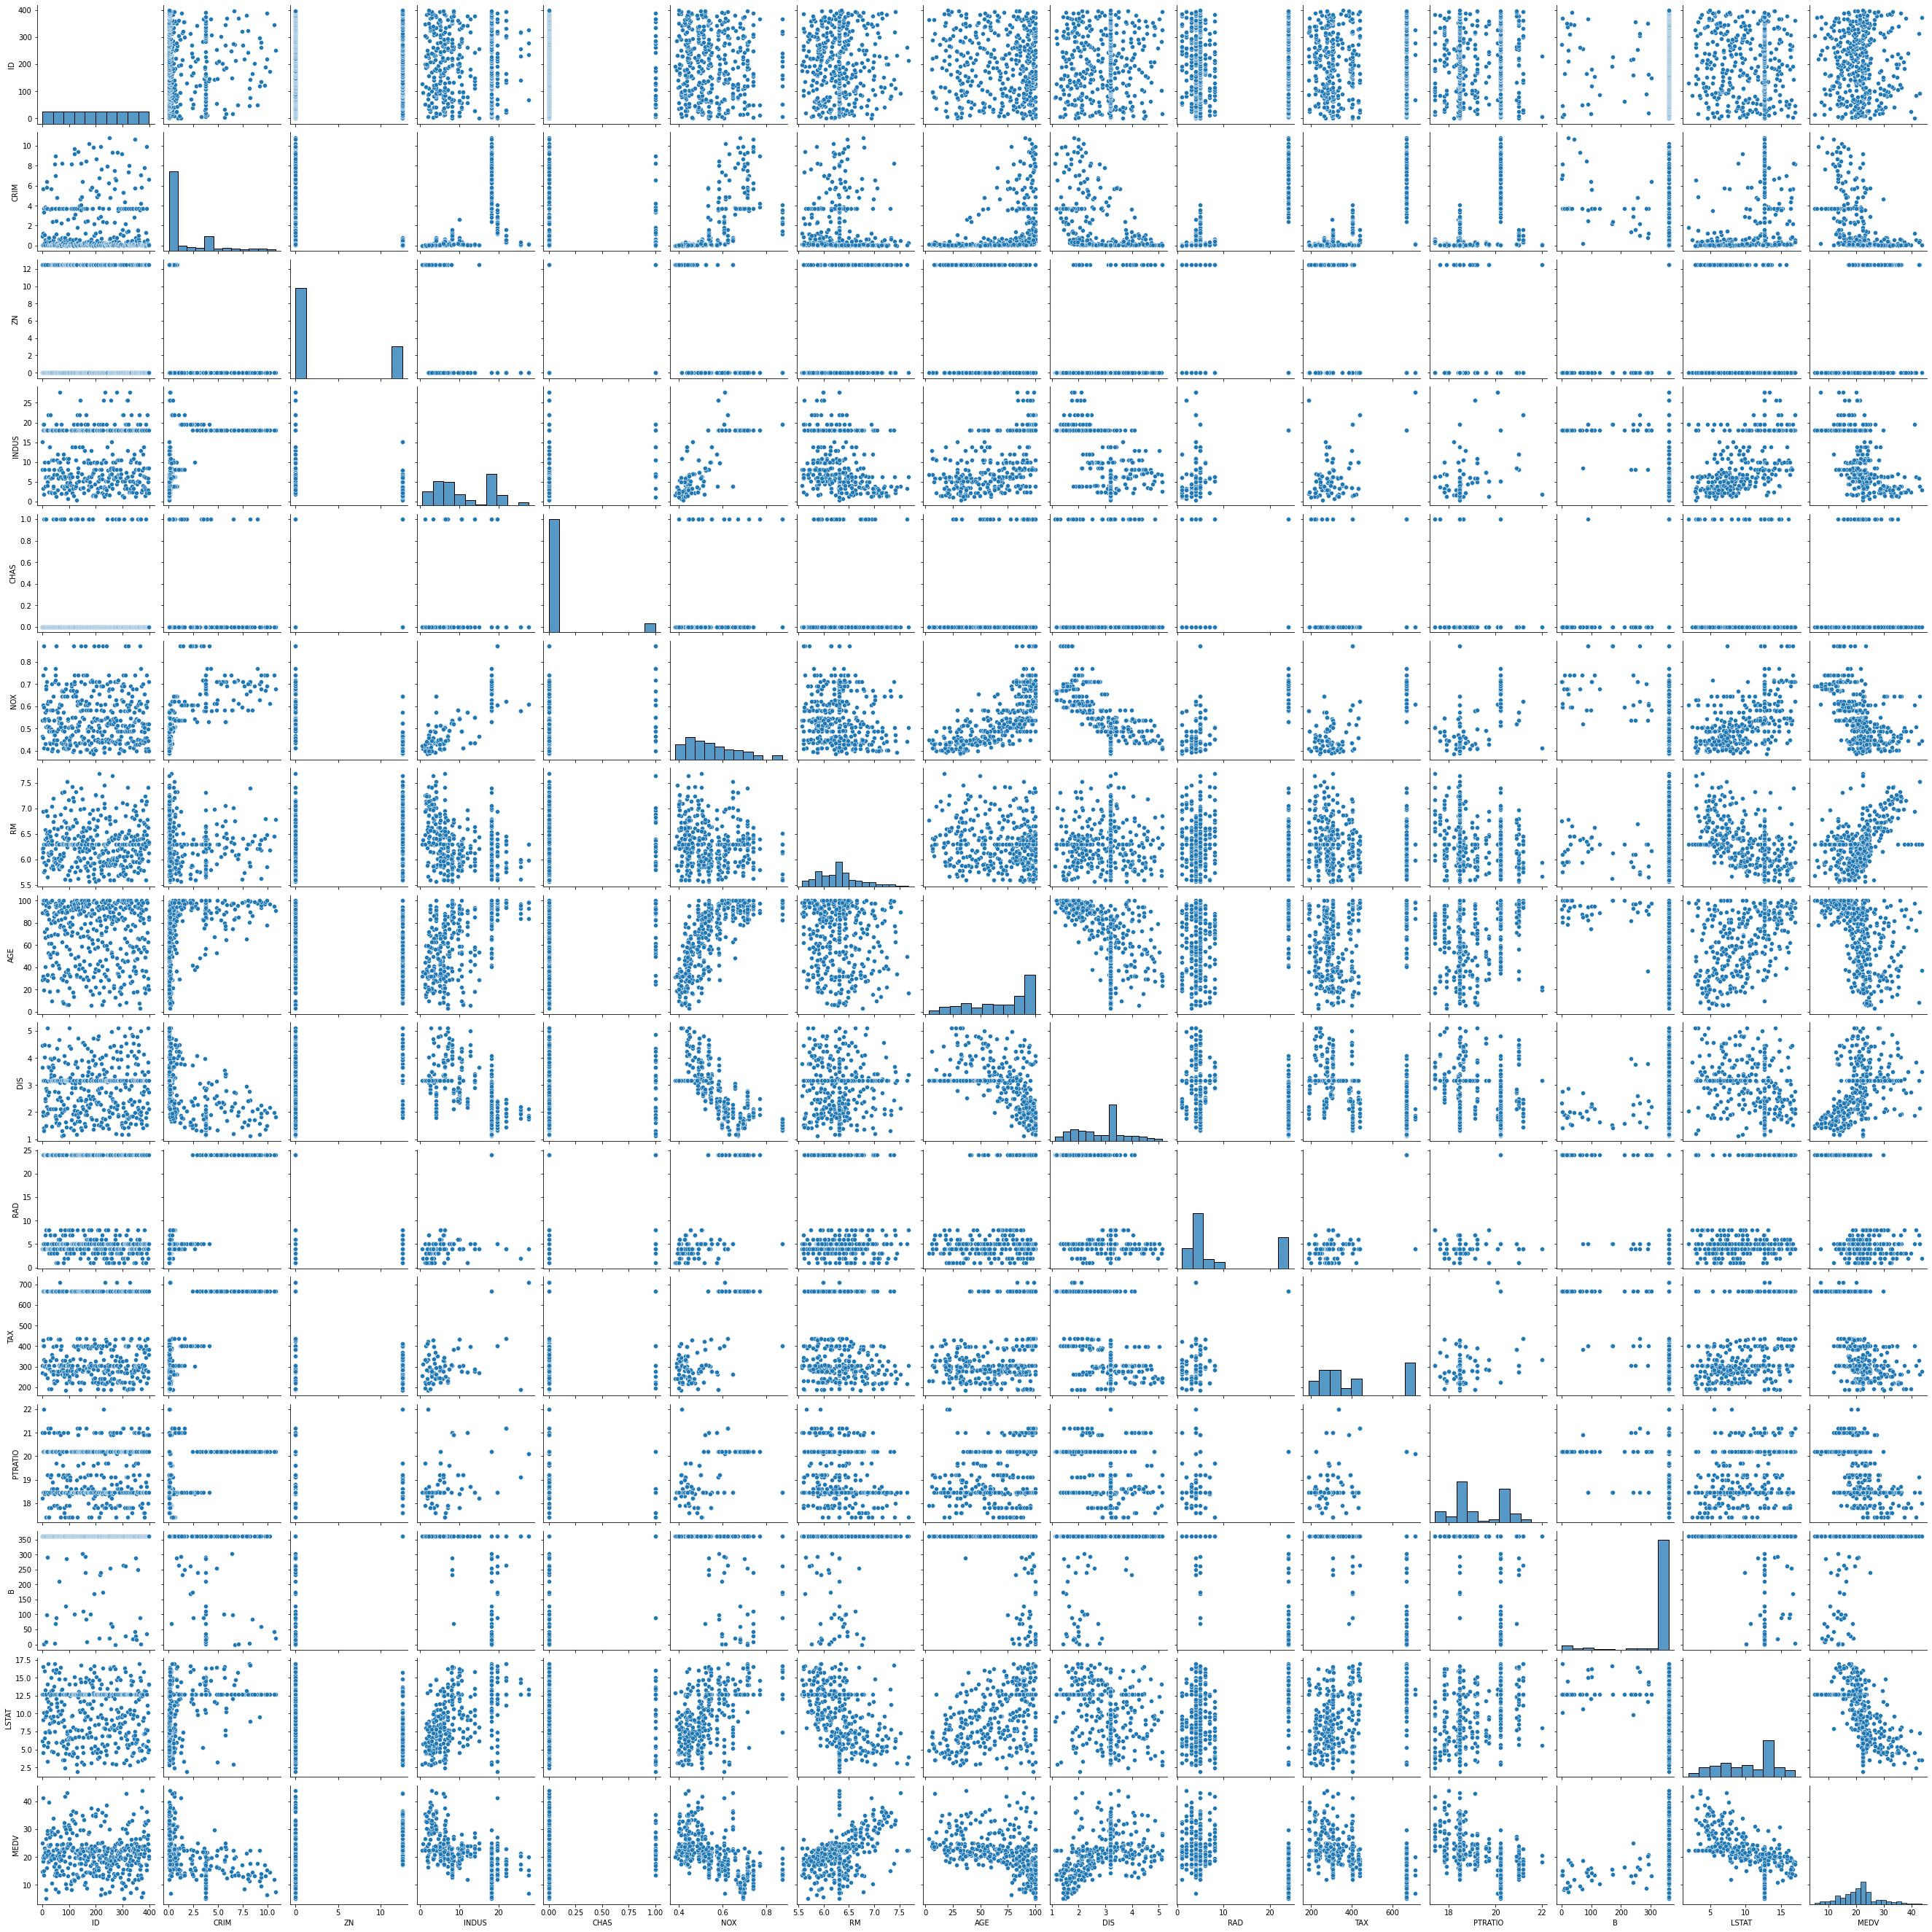

In [166]:
sns.pairplot(df)

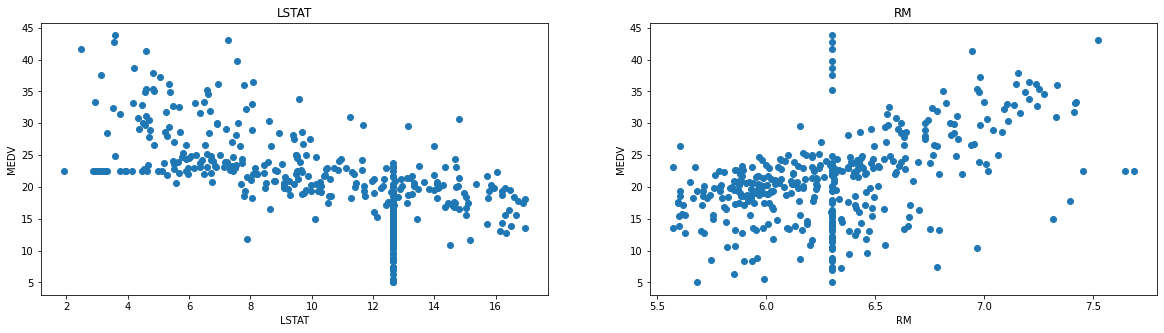

In [151]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Scaling**

In [168]:
df.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [190]:
X= df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT',]].values
y = df[["MEDV"]].values   

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)


In [192]:
scaling = StandardScaler()
scaling.fit_transform(X_train,y_train)
X_train_scaled = scaling.transform(X_train) 
X_test_scaled = scaling.transform(X_test)
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)


0.5048762408496782

In [193]:
reg.intercept_

array([21.3408125])

In [194]:
y_pred = reg.predict(X_test_scaled)
y_pred

array([[13.68255267],
       [14.44997623],
       [25.39583475],
       [24.45529599],
       [20.76366854],
       [21.67063775],
       [21.02761157],
       [13.31131826],
       [18.48722921],
       [13.71879828],
       [30.23467713],
       [23.28836875],
       [27.82881825],
       [27.3846009 ],
       [16.51019907],
       [21.55641721],
       [21.7126605 ],
       [15.24313292],
       [25.18004504],
       [33.08092581],
       [17.0071888 ],
       [14.06703007],
       [20.72973217],
       [23.9380959 ],
       [29.14858211],
       [25.50817431],
       [23.84879979],
       [11.0614407 ],
       [25.70624851],
       [21.90780673],
       [20.641886  ],
       [14.34485757],
       [21.40697076],
       [23.67690076],
       [21.80904377],
       [26.78728666],
       [27.30567239],
       [16.75363994],
       [21.93747865],
       [26.33102571],
       [28.75145285],
       [23.01263998],
       [11.34705161],
       [26.30482812],
       [15.47795569],
       [15

In [200]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.8203239147813757
Mean Squared Error: 12.067346137973278
R2- SCORE: 0.5048762408496782
RMSE: 3.4738085925930458


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


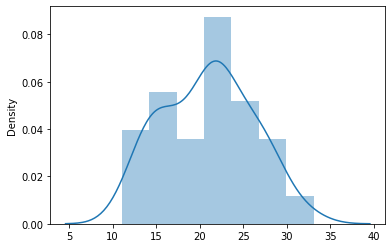

In [197]:
sns.distplot(y_pred)